In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [347]:
blr = pd.read_csv('/content/Bangalore  house data.csv')

In [348]:
blr.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [349]:
print(blr.shape)

(13320, 9)


In [350]:
# size col itself is not much important, but the numbers mentioned their shows no of bedrooms is useful.
# extracting pure numerical val out in total_sqft col.


blr['no of bedrooms'] = blr['size'].str.split(" ").str.get(0)
blr['total_sqft'] = blr['total_sqft'].str.split('-').str.get(0)
blr['total_sqft'] = blr['total_sqft'].str.split('S').str.get(0)
blr['total_sqft'] = blr['total_sqft'].str.split('P').str.get(0)
blr['total_sqft'] = blr['total_sqft'].str.split('A').str.get(0)
blr['total_sqft'] = blr['total_sqft'].str.split('C').str.get(0)
blr['total_sqft'] = blr['total_sqft'].str.split('G').str.get(0)

In [351]:
# changing datatype of 'no of bedrooms' and 'total_sqft' columns

blr['no of bedrooms'] = blr['no of bedrooms'].astype('float64')
blr['total_sqft'] = blr['total_sqft'].astype(dtype='float64')

In [352]:
# checking for duplicate val

blr.duplicated().any()

True

In [353]:
# checking for null values

blr.isnull().sum()

area_type            0
availability         0
location             1
size                16
society           5502
total_sqft           0
bath                73
balcony            609
price                0
no of bedrooms      16
dtype: int64

In [354]:
# droping duplicated and null values

blr.drop_duplicates(inplace=True)
blr.dropna(inplace=True)

In [355]:
blr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 13318
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       7144 non-null   object 
 1   availability    7144 non-null   object 
 2   location        7144 non-null   object 
 3   size            7144 non-null   object 
 4   society         7144 non-null   object 
 5   total_sqft      7144 non-null   float64
 6   bath            7144 non-null   float64
 7   balcony         7144 non-null   float64
 8   price           7144 non-null   float64
 9   no of bedrooms  7144 non-null   float64
dtypes: float64(5), object(5)
memory usage: 613.9+ KB


In [356]:
blr.describe()

,total_sqft,bath,balcony,price,no of bedrooms
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,1509.795999,2.463466,1.626960,97.999645,2.533035
std,950.397664,0.886887,0.786528,107.347318,0.737033
min,11.000000,1.000000,0.000000,8.000000,1.000000
25%,1111.750000,2.000000,1.000000,50.000000,2.000000
50%,1310.000000,2.000000,2.000000,70.000000,2.000000
75%,1662.000000,3.000000,2.000000,105.000000,3.000000
max,36000.000000,9.000000,3.000000,2700.000000,11.000000


In [357]:
blr['area_type'].value_counts()

Super built-up  Area    5672
Built-up  Area          1152
Plot  Area               268
Carpet  Area              52
Name: area_type, dtype: int64



1.   **Out of all categorical columns, keeping 'area_type' as it seems more reliable.**
2. **We wil drop columns like availability,	location,	size,	society.**



In [358]:
blr.drop(columns=['availability','location','size','society'],inplace=True,axis=1)
blr.head(1)

,area_type,total_sqft,bath,balcony,price,no of bedrooms
0,Super built-up Area,1056.0,2.0,1.0,39.07,2.0


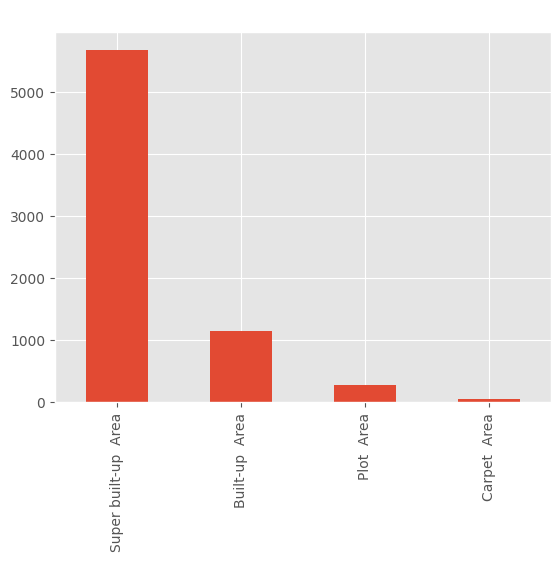

In [359]:
blr['area_type'].value_counts().plot(kind='bar')

plt.title('Bar Graph')
plt.show()



1.   **From the above graph it can be observed that data seems to be biased towards super built-up area.This could led to uneven data split and overfitting.**
2.   **To solve this, we are going to use stratified sampling to split training and testing data homogenously.**








## **Spliting data into Training and Testing Set**

In [360]:
from sklearn.model_selection import StratifiedShuffleSplit

strat = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)

strat_splits = []

for train_index, test_index in strat.split(blr, blr['area_type']):
  strat_train_set = blr.iloc[train_index]
  strat_test_set = blr.iloc[test_index]
  strat_splits.append([strat_train_set,strat_test_set])

In [361]:
strat_train_1, strat_test_1 = strat_splits[0]

In [362]:
# Droping 'area_type' as regression problem need numerical values

for i in (strat_train_1, strat_test_1):
  i.drop('area_type', axis=1, inplace=True)

<ipython-input-362-c16db68d3f73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('area_type', axis=1, inplace=True)
<ipython-input-362-c16db68d3f73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('area_type', axis=1, inplace=True)


In [363]:
print(strat_train_1.shape)
print(strat_test_1.shape)

(5715, 5)
(1429, 5)


## **EDA**

In [364]:
train_data = strat_train_1.copy()

In [365]:
train_data['total_rooms'] = train_data['bath'] + train_data['no of bedrooms']

In [366]:
train_data.corr()

,total_sqft,bath,balcony,price,no of bedrooms,total_rooms
total_sqft,1.000000,0.600142,0.205501,0.636445,0.565438,0.611740
bath,0.600142,1.000000,0.267450,0.604095,0.823782,0.963170
balcony,0.205501,0.267450,1.000000,0.162894,0.307323,0.298867
price,0.636445,0.604095,0.162894,1.000000,0.531415,0.597865
no of bedrooms,0.565438,0.823782,0.307323,0.531415,1.000000,0.945880
total_rooms,0.611740,0.963170,0.298867,0.597865,0.945880,1.000000


**We will drop balcony column later as it is not that much related to price**

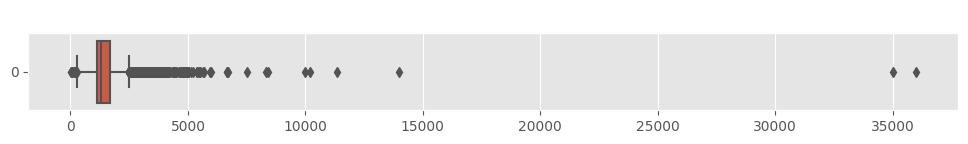

In [367]:
plt.figure(figsize=(12,1))

sns.boxplot(train_data['total_sqft'], orient='h')

plt.title('total_sqft Boxplot')
plt.show()

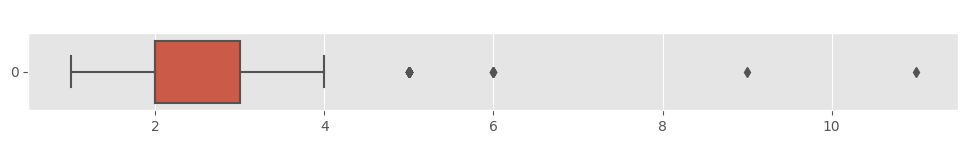

In [368]:
plt.figure(figsize=(12,1))

sns.boxplot(train_data['no of bedrooms'], orient='h')

plt.title(' No of bedrooms Boxplot')
plt.show()

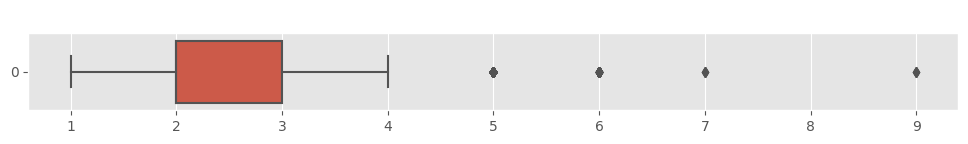

In [369]:
plt.figure(figsize=(12,1))

sns.boxplot(train_data['bath'], orient='h')

plt.title('Bath Boxplot')
plt.show()

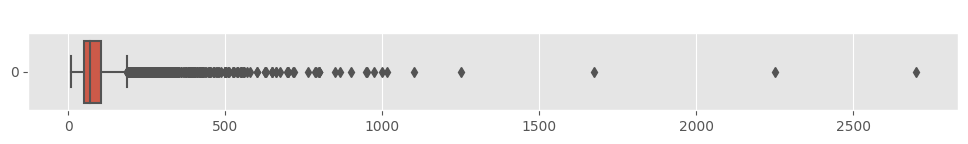

In [370]:
plt.figure(figsize=(12,1))

sns.boxplot(train_data['price'], orient='h',)

plt.title('price Boxplot')
plt.show()

## Preparing the Data

In [371]:
# dropping balcony column
train_df = strat_train_1.copy()
train_df.drop(columns='balcony',inplace=True)

test_df = strat_test_1.copy()
test_df.drop(columns='balcony',inplace=True)
train_df.head()

,total_sqft,bath,price,no of bedrooms
8240,1183.0,2.0,77.25,2.0
6635,1450.0,3.0,44.00,3.0
11004,1100.0,2.0,78.00,3.0
13026,1020.0,2.0,40.80,2.0
12758,2250.0,3.0,180.00,3.0


In [372]:
train_df.head(2)

,total_sqft,bath,price,no of bedrooms
8240,1183.0,2.0,77.25,2.0
6635,1450.0,3.0,44.00,3.0


In [373]:
test_df.head(2)

,total_sqft,bath,price,no of bedrooms
7457,1770.0,3.0,100.0,3.0
421,1991.0,4.0,103.0,3.0


In [374]:
feature_train = train_df.drop(columns=['price'],axis=1)
target_train = train_df.drop(columns=['total_sqft','bath','no of bedrooms'],axis=1)
feature_test = test_df.drop(columns=['price'], axis=1)
target_test = test_df.drop(columns=['total_sqft','bath','no of bedrooms'], axis=1)

## **Training and Testing Model**

In [375]:
from sklearn.linear_model import LinearRegression


In [376]:
lr = LinearRegression()

In [377]:
lr.fit(feature_train, target_train)

LinearRegression()

In [378]:
y_pred_train = lr.predict(feature_train)

In [379]:
from sklearn.metrics import mean_squared_error,r2_score

In [380]:
# rmse score on training data
mean_squared_error(target_train,y_pred_train,squared=False)

75.2910792347144

In [381]:
# r2_score on training data
r2_score(target_train,y_pred_train)

0.4822204699478718

In [382]:
# r2_score on test data
y_pred = lr.predict(feature_test)
r2_score(target_test, y_pred)

0.5324369250480991

In [383]:
# rmse score on test data

mean_squared_error(target_test,y_pred,squared=False)

80.35337002302562